In [1]:
import numpy as np

import pandas as pd

import seaborn as sns

In [4]:
# 데이터 로드 및 확인
column_names = ["area ", "perimeter ", "compactness ", "length of kernel", "width of kernel", "asymmetry coefficient", "length of kernel groove", "class"]
df = pd.read_csv("C:/Users/rudal/OneDrive/Ai/seeds_dataset.txt", header=0,names=column_names, delimiter='\s+')
df.head(10)
df

,area,perimeter,compactness,length of kernel,width of kernel,asymmetry coefficient,length of kernel groove,class
0,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
1,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
2,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
3,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
4,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1
...,...,...,...,...,...,...,...,...
204,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
205,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
206,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
207,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [5]:
# 결측치 확인
df.isnull().sum()

area                       0
perimeter                  0
compactness                0
length of kernel           0
width of kernel            0
asymmetry coefficient      0
length of kernel groove    0
class                      0
dtype: int64

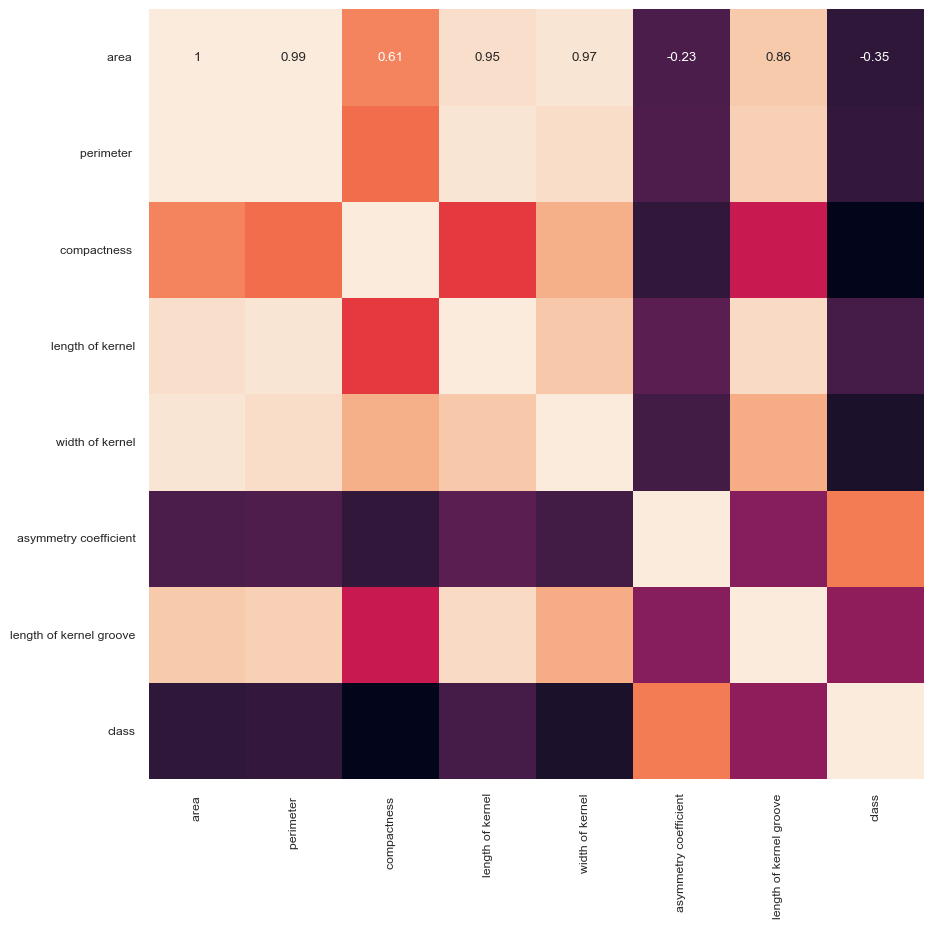

In [6]:
import seaborn as sns

import matplotlib.pyplot as plt

import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

df_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

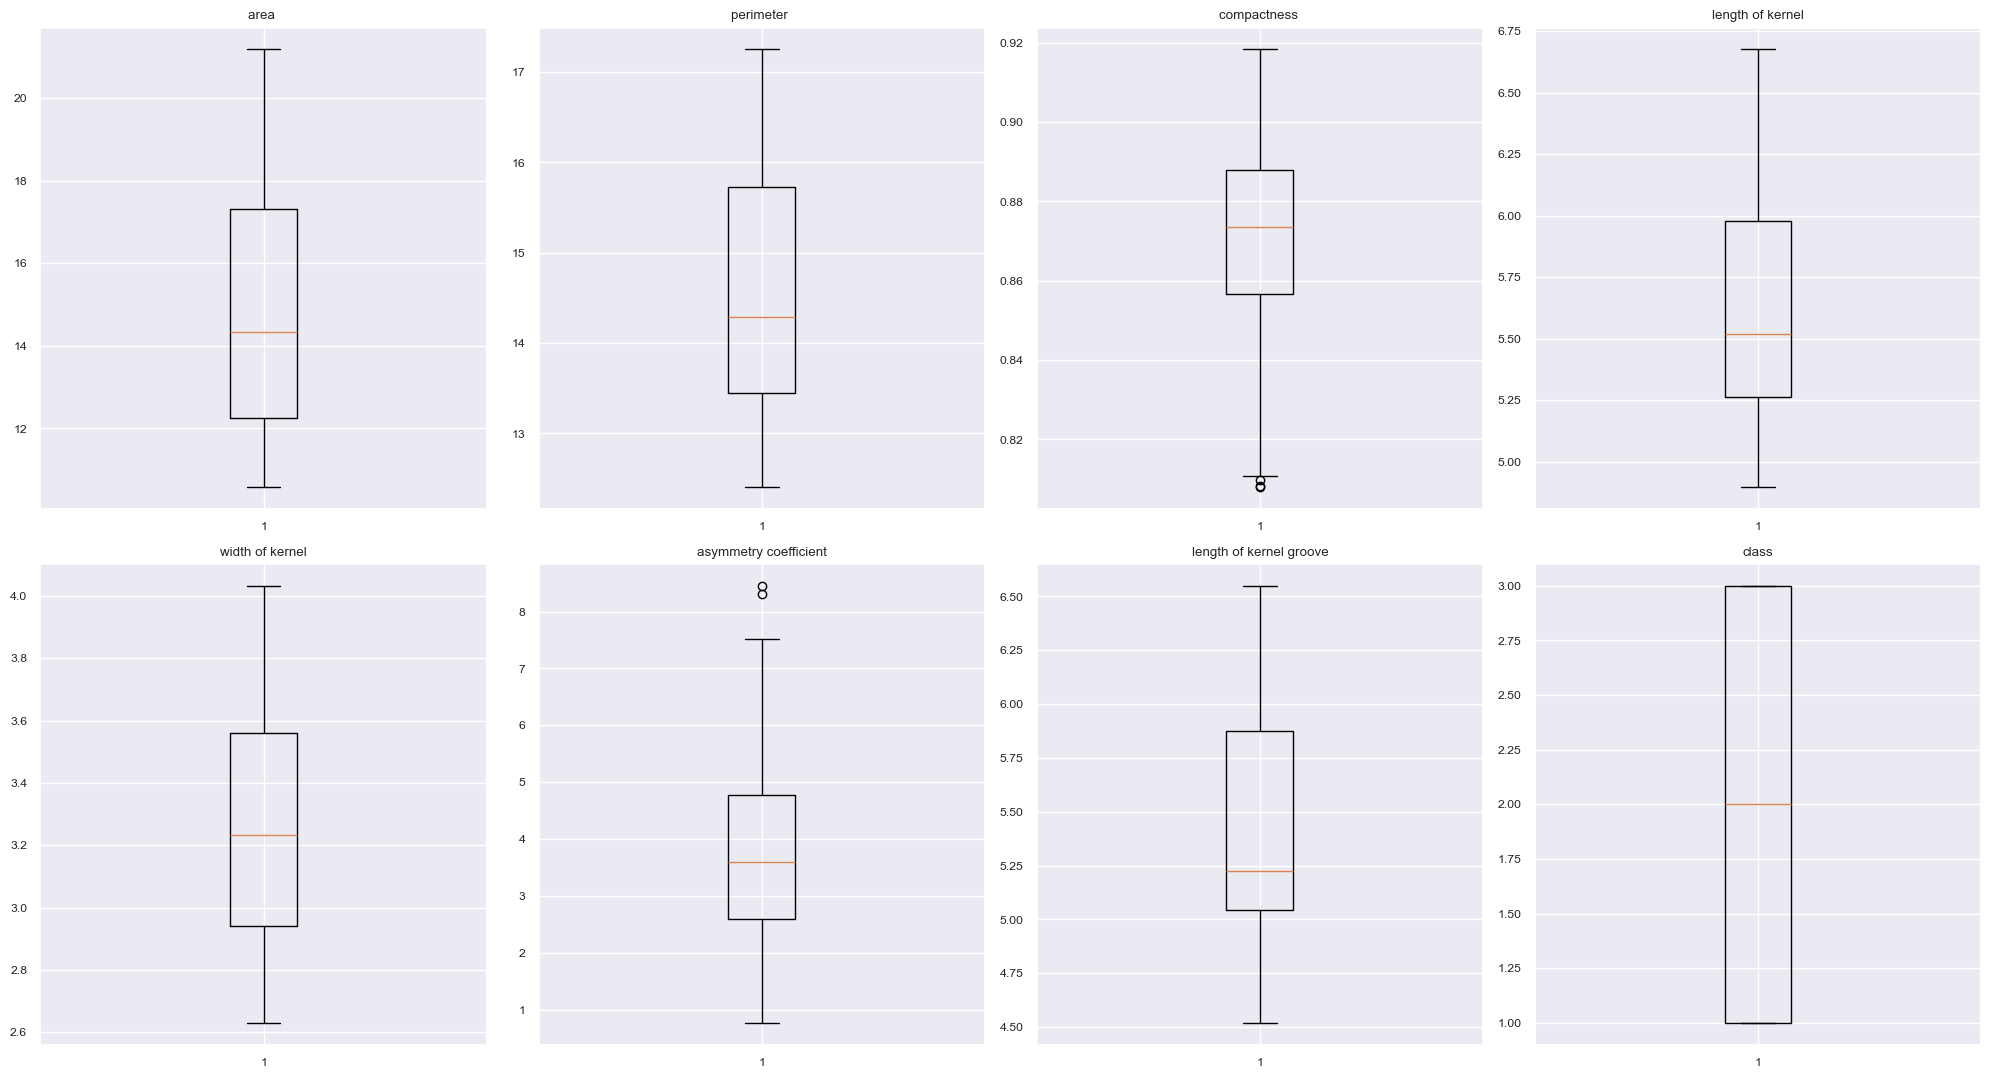

In [7]:
# 박스 플롯 그리기
plt.figure(figsize=(20, 16))
for i, column in enumerate(df.columns):
    plt.subplot(3, 4, i+1)
    plt.boxplot(df[column])
    plt.title(column)

plt.tight_layout()
plt.show()

C:\Users\rudal\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rudal\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rudal\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Label')

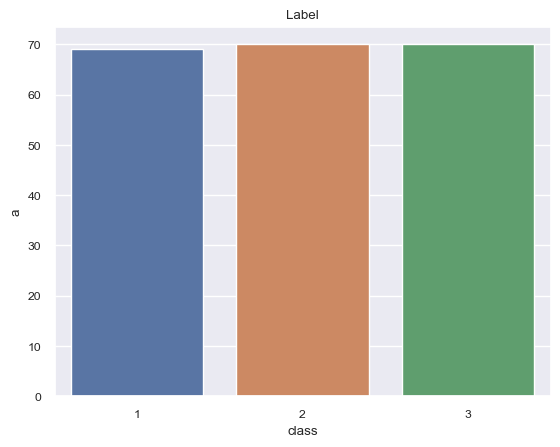

In [8]:
# 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x="class")
plt.ylabel("a")
plt.title("Label")

In [9]:
# 레이블 갯수 확인 (숫자)
df['class'].value_counts()

class
2    70
3    70
1    69
Name: count, dtype: int64

In [10]:
from sklearn.preprocessing import StandardScaler

# 표준화(Standardization)
scaler = StandardScaler()
scaled_data_standard = scaler.fit_transform(df.drop('class', axis=1))  # rings 열 제외하고 표준화
scaled_df_standard = pd.DataFrame(scaled_data_standard, columns=df.columns[:-1])  # 데이터프레임으로 변환
scaled_df_standard

,area,perimeter,compactness,length of kernel,width of kernel,asymmetry coefficient,length of kernel groove
0,0.011840,0.009234,0.427494,-0.166808,0.197647,-1.792787,-0.921971
1,-0.190940,-0.358353,1.438945,-0.760533,0.208238,-0.672161,-1.188607
2,-0.345602,-0.473224,1.036904,-0.686035,0.319438,-0.965484,-1.229314
3,0.444896,0.330872,1.371233,0.067974,0.803955,-1.568128,-0.476222
4,-0.160007,-0.266457,1.019976,-0.546070,0.142047,-0.830155,-0.921971
...,...,...,...,...,...,...,...
204,-0.912699,-1.039921,0.308998,-1.108190,-0.734318,-0.050850,-1.097014
205,-1.242645,-1.284979,-0.842110,-1.101418,-1.226777,0.411799,-0.826308
206,-0.565567,-0.687650,0.732199,-0.884697,-0.069763,3.071702,-0.718433
207,-1.032992,-1.032263,-0.799790,-1.022405,-1.118225,-0.072850,-0.742857


In [11]:
x=scaled_df_standard

X = x.values

X

array([[ 0.0118402 ,  0.00923364,  0.42749407, ...,  0.19764747,
        -1.79278662, -0.9219711 ],
       [-0.19093968, -0.35835326,  1.43894519, ...,  0.20823799,
        -0.67216102, -1.18860657],
       [-0.3456023 , -0.47322416,  1.03690395, ...,  0.31943844,
        -0.9654836 , -1.22931428],
       ...,
       [-0.56556692, -0.68764985,  0.73219901, ..., -0.06976315,
         3.07170181, -0.71843257],
       [-1.03299173, -1.03226257, -0.79978973, ..., -1.11822457,
        -0.07284964, -0.7428572 ],
       [-0.87489216, -0.93270779, -0.10997159, ..., -0.75285165,
         1.28643389, -0.70418488]])

In [12]:
Y = df['class']
Y.shape

(209,)

In [13]:

def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.25,random_state=0)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(156, 7) (53, 7) (156,) (53,)


In [15]:
# Merge train and test X/y data to apply sequence transformation function
y_train_array = np.array(y_train)
train_set = np.c_[X_train, y_train_array]

y_test_array = np.array(y_test)
test_set = np.c_[X_test, y_test_array]

# Apply sequence transformation using time step of 25 for both train and test data
# All sensing modalities are recorded at a sampling rate of 50 Hz, which is considered sufficient for capturing human activity.

X_train, y_train = split_sequences(train_set, 3)
print(X_train.shape, y_train.shape)

X_test, y_test = split_sequences(test_set, 3)
print(X_test.shape, y_test.shape)   

(154, 3, 7) (154,)
(51, 3, 7) (51,)


In [16]:
y_train_onehot = pd.get_dummies(y_train).values
y_test_onehot = pd.get_dummies(y_test).values

print(y_train_onehot.shape, y_test_onehot.shape)

(154, 3) (51, 3)


In [17]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam

from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import Input
from keras.layers import Dense, Flatten, Dropout

In [18]:
n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], y_train_onehot.shape[1]

In [19]:
input_layer = Input(shape=(n_timesteps,n_features))

conv1 = Conv1D(filters=64, kernel_size=3, activation='relu')(input_layer) 
flat = Flatten()(conv1)
dens = Dense(64, activation = "relu")(flat)
outputs = Dense(3, activation = "sigmoid")(dens)

model = keras.Model(input_layer, outputs)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 3, 7)]            0         
                                                                 
 conv1d (Conv1D)             (None, 1, 64)             1408      
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 3)                 195       
                                                                 
Total params: 5763 (22.51 KB)
Trainable params: 5763 (22.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
train_epochs = 30
history = model.fit(X_train, y_train_onehot, epochs=train_epochs, verbose=True,  validation_split = 0.1)

Epoch 1/30
5/5 [==============================] - 78899s 86ms/step - loss: 0.6718 - accuracy: 0.5217 - val_loss: 0.6153 - val_accuracy: 0.7500
Epoch 2/30
5/5 [==============================] - 0s 13ms/step - loss: 0.6125 - accuracy: 0.6957 - val_loss: 0.5663 - val_accuracy: 0.8125
Epoch 3/30
5/5 [==============================] - 0s 16ms/step - loss: 0.5666 - accuracy: 0.8333 - val_loss: 0.5258 - val_accuracy: 0.8125
Epoch 4/30
5/5 [==============================] - 0s 15ms/step - loss: 0.5249 - accuracy: 0.8768 - val_loss: 0.4893 - val_accuracy: 0.8125
Epoch 5/30
5/5 [==============================] - 0s 15ms/step - loss: 0.4874 - accuracy: 0.9058 - val_loss: 0.4549 - val_accuracy: 0.8125
Epoch 6/30
5/5 [==============================] - 0s 15ms/step - loss: 0.4512 - accuracy: 0.8913 - val_loss: 0.4235 - val_accuracy: 0.8125
Epoch 7/30
5/5 [==============================] - 0s 16ms/step - loss: 0.4156 - accuracy: 0.9130 - val_loss: 0.3921 - val_accuracy: 0.8750
Epoch 8/30
5/5 [=======

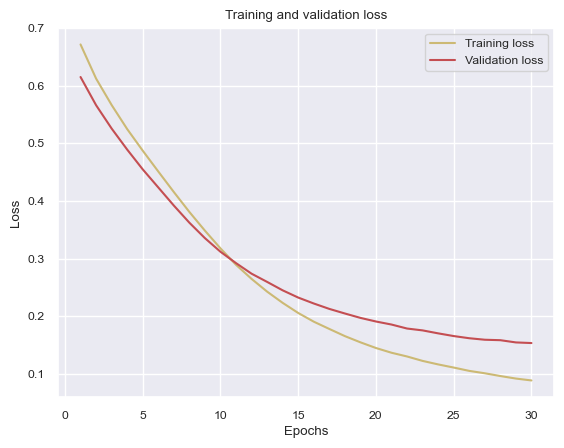

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =history.history['loss']
val_loss =history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [22]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix


y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test_onehot,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

2/2 [==============================] - 0s 1ms/step


In [23]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      0.88      0.93        16
           1       1.00      1.00      1.00        20
           2       0.88      1.00      0.94        15

    accuracy                           0.96        51
   macro avg       0.96      0.96      0.96        51
weighted avg       0.97      0.96      0.96        51

[[14  0  2]
 [ 0 20  0]
 [ 0  0 15]]
